<br>
<img src="data/logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Hager Oueslati</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Python avancé</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Visualisation</span></div><br>
<hr/>

# Importation des modules 

In [1]:
import plotly.express as px
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture de la base de données

In [2]:
table = pd.read_excel('data/data.xlsx', sheet_name='data')

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               1030 non-null   object 
 1   Dep                1030 non-null   object 
 2   Code_dep           1030 non-null   float64
 3   Code_postal        1030 non-null   float64
 4   loyer              1030 non-null   float64
 5   charges            1030 non-null   float64
 6   Superficie         1030 non-null   float64
 7   nb_piece           1030 non-null   float64
 8   Garantie           1030 non-null   float64
 9   Etage              1030 non-null   float64
 10  Ascenseur          1030 non-null   object 
 11  WC_separe          1030 non-null   object 
 12  Cave               1030 non-null   object 
 13  Interphone         1030 non-null   object 
 14  Gardien            1030 non-null   object 
 15  Digicode           1030 non-null   object 
 16  Terrain_extérieur  1029 

# Traitements sur la base de données

Il faut noter qu'un travail a été également effectué sous excel pour la base de données. En effet, nous avions des valeurs manquantes pour  le nombre pièces sur certaines observations (**20** sur **1032**). Cependant, ces informations pouvaient être retrouvées dans la colonne description. Nous avons donc renseigné ces valeurs manuellement, ne pouvant les traiter via une regex.

## Gestion des valeurs manquantes

In [4]:
# Traitement des valeurs manquantes
table.isna().sum()

Type                   2
Dep                    2
Code_dep               2
Code_postal            2
loyer                  2
charges                2
Superficie             2
nb_piece               2
Garantie               2
Etage                  2
Ascenseur              2
WC_separe              2
Cave                   2
Interphone             2
Gardien                2
Digicode               2
Terrain_extérieur      3
Terrasse               2
Balcon                 2
stationnement        321
Chauffage            932
Description            2
dtype: int64

In [1]:
# Je supprime les lignes qui n'ont aucune valeurs renseignée
table = table.dropna(how='all')

NameError: name 'table' is not defined

In [9]:
# Pour ceux qui ont un terrain extérieur on fournit la dimension du terrain
table['Terrain_extérieur'] = np.where(table['Terrain_extérieur']!='Non', 'Oui', 'Non')

In [7]:
table['stationnement']     = table['stationnement'].fillna(value='Information indisponible')
table['Chauffage']         = table['Chauffage'].fillna(value='Information indisponible')
table['Terrain_extérieur'] = table['Terrain_extérieur'].fillna(value='Information indisponible')

## Type de variables

In [8]:
table['Code_postal'] = table['Code_postal'].astype(int).astype(str)
table['Code_dep']    = table['Code_dep'].astype(int).astype(str)
table['Superficie']  = table['Superficie'].astype(int)
table['nb_piece']    = table['nb_piece'].astype(int)
table['Etage']       = table['Etage'].astype(int)

## Création de la variable "libelle_departement"

In [10]:
DEPARTMENTS = {
    '1': 'Ain', 
    '2': 'Aisne', 
    '3': 'Allier', 
    '4': 'Alpes-de-Haute-Provence', 
    '5': 'Hautes-Alpes',
    '6': 'Alpes-Maritimes', 
    '7': 'Ardèche', 
    '8': 'Ardennes', 
    '9': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

In [12]:
table['Departement'] = table['Code_dep'].map(DEPARTMENTS)

In [13]:
#table.to_csv('data/dataf.csv')

# Statistiques descriptives

In [77]:
table.describe()

,loyer,charges,Superficie,nb_piece,Garantie,Etage
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,868.981553,94.712621,55.322330,2.458252,869.938835,2.857282
std,657.115816,88.983947,28.726129,1.157938,682.923124,2.627140
min,236.000000,0.000000,10.000000,1.000000,0.000000,0.000000
25%,521.000000,40.000000,34.000000,2.000000,522.000000,1.000000
50%,699.000000,75.000000,53.000000,2.000000,688.000000,2.000000
75%,929.000000,121.000000,70.000000,3.000000,934.750000,4.000000
max,7275.000000,1090.000000,235.000000,7.000000,9360.000000,19.000000


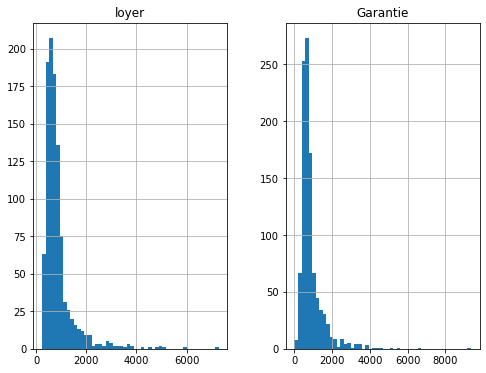

In [17]:
table[["loyer", "Garantie"]].hist(bins=50, figsize=(8,6))
plt.show()

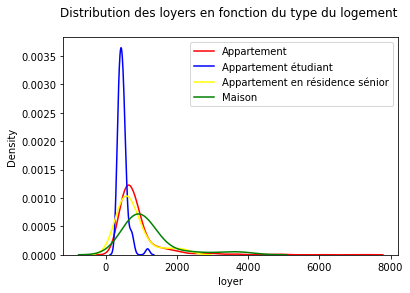

In [14]:
plt.figsize=(10,5)
x1 = table[table["Type"] == "Appartement"]["loyer"]
x2 = table[table["Type"] == "Appartement étudiant"]["loyer"]
x3 = table[table["Type"] == "Appartement en résidence sénior"]["loyer"]
x4 = table[table["Type"] == "Maison"]["loyer"]

fig, ax = plt.subplots()
sns.kdeplot(x1, color='red', label = "Appartement")
sns.kdeplot(x2, color='blue', label = "Appartement étudiant")
sns.kdeplot(x3, color='yellow', label = "Appartement en résidence sénior")
sns.kdeplot(x4, color='green', label = "Maison")
plt.legend(loc='upper right')
plt.title("Distribution des loyers en fonction du type du logement \n")
plt.show()

* On a une distribution asymétriques des loyers dans notre base de données. La plupart des loyers sont inférieurs à 2000 €
* On remarque une distribution des garanties similaire à celle des loyers. Ce qui est normal car la garantie correspond le plus souvent à une ou deux mensualité du loyer.
* En observant la décomposition de ces loyers en fonction du type de logement on se rend compte les appartements ont les loyers les plus élevés. 
* Les appartements étudiants ont les loyers les plus faibles.


In [15]:
col_cat = ['Ascenseur', 'WC_separe', 'Cave', 'Interphone', 'Gardien', 'Digicode', 'Terrain_extérieur', 'Terrasse', 'Balcon']

In [19]:
result = pd.concat([table[col].value_counts().rename(col) for col in col_cat], axis=1)
print(result.T)

                      Oui     Non
Ascenseur          1030.0     NaN
WC_separe           897.0   133.0
Cave               1030.0     NaN
Interphone          897.0   133.0
Gardien            1030.0     NaN
Digicode           1030.0     NaN
Terrain_extérieur    20.0  1010.0
Terrasse            897.0   133.0
Balcon              256.0   774.0


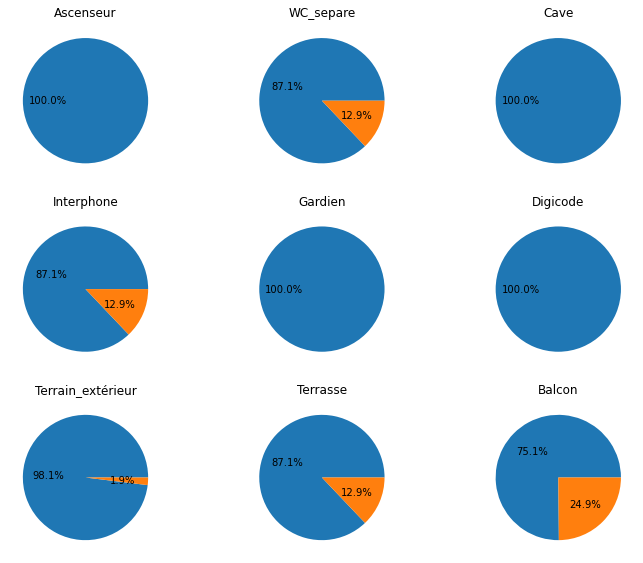

In [76]:
#fig, axs = plt.subplots(1, len(col_cat), figsize=(15, 5))
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.ravel()
fig.tight_layout()

for i, col in enumerate(col_cat):
    axs[i].pie(table[col].value_counts(), autopct = lambda x: str(round(x, 1)) + '%')
    axs[i].set_title(col)

* Nous avons plusieurs variables unimodales. 
* Tous nos logements sont dotés d’ascenseur, de WC séparé, Cave, Gardien, Digicode, Terrain extérieur
* La majorité ont une terrasse, un balcon et un interphone 


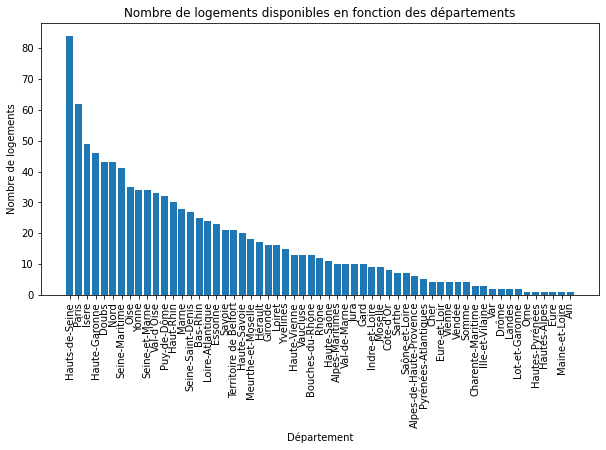

In [21]:
logement_count = table.groupby("Departement").size().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(logement_count.index, logement_count.values)
plt.xlabel('Département')
plt.ylabel('Nombre de logements')
plt.title('Nombre de logements disponibles en fonction des départements')
plt.xticks(rotation=90)
plt.show()

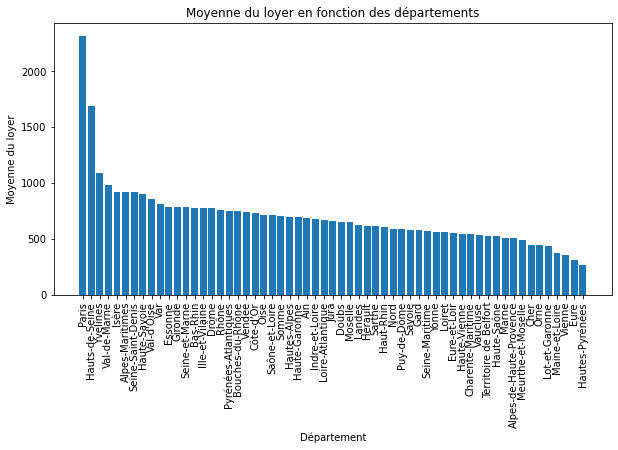

In [23]:
department_stats = table.groupby("Departement").describe()['loyer'].sort_values(by='mean', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(department_stats.index, department_stats['mean'])
plt.xlabel('Département')
plt.ylabel('Moyenne du loyer')
plt.title('Moyenne du loyer en fonction des départements')
plt.xticks(rotation=90)
plt.show()

In [24]:
department_stats = table.groupby("Departement").describe()['loyer'].sort_values(by='mean', ascending=False)

highlighted_table = department_stats.style.background_gradient(cmap='Reds')
display(highlighted_table)

,count,mean,std,min,25%,50%,75%,max
Departement,,,,,,,,
Paris,62.000000,2317.677419,1368.190785,505.000000,1395.000000,1953.000000,2929.000000,7275.000000
Hauts-de-Seine,84.000000,1694.809524,785.008794,510.000000,1219.500000,1561.500000,1871.500000,4900.000000
Yvelines,15.000000,1094.866667,490.429676,435.000000,804.500000,967.000000,1419.000000,1995.000000
Val-de-Marne,10.000000,983.400000,134.548793,820.000000,902.750000,983.000000,990.000000,1297.000000
Isère,49.000000,923.122449,382.604105,316.000000,698.000000,889.000000,1027.000000,1981.000000
Alpes-Maritimes,10.000000,919.800000,193.104923,650.000000,744.000000,963.000000,1080.250000,1194.000000
Seine-Saint-Denis,27.000000,916.925926,269.139787,548.000000,677.000000,889.000000,1056.000000,1687.000000
Haute-Savoie,20.000000,900.950000,427.493733,423.000000,647.250000,855.500000,980.000000,2500.000000
Val-d'Oise,33.000000,855.181818,273.816254,430.000000,606.000000,849.000000,970.000000,1567.000000


* Les départements qui comptabilisent le plus de logements sont : Hauts-de-Seine, Paris, Isère, Haute-Garonne
* Cependant les départements qui ont les loyers les plus élevés sont Paris, Hauts-de-Seine, Yveline et Val-de-Marne


# Nuage de mots

In [43]:
table_maison=table[table["Type"]=="Maison"]
table_appart=table[table["Type"]=="Appartement"]
table_etud  =table[table["Type"]=="Appartement étudiant"]
table_senior=table[table["Type"]=="Appartement en résidence sénior"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


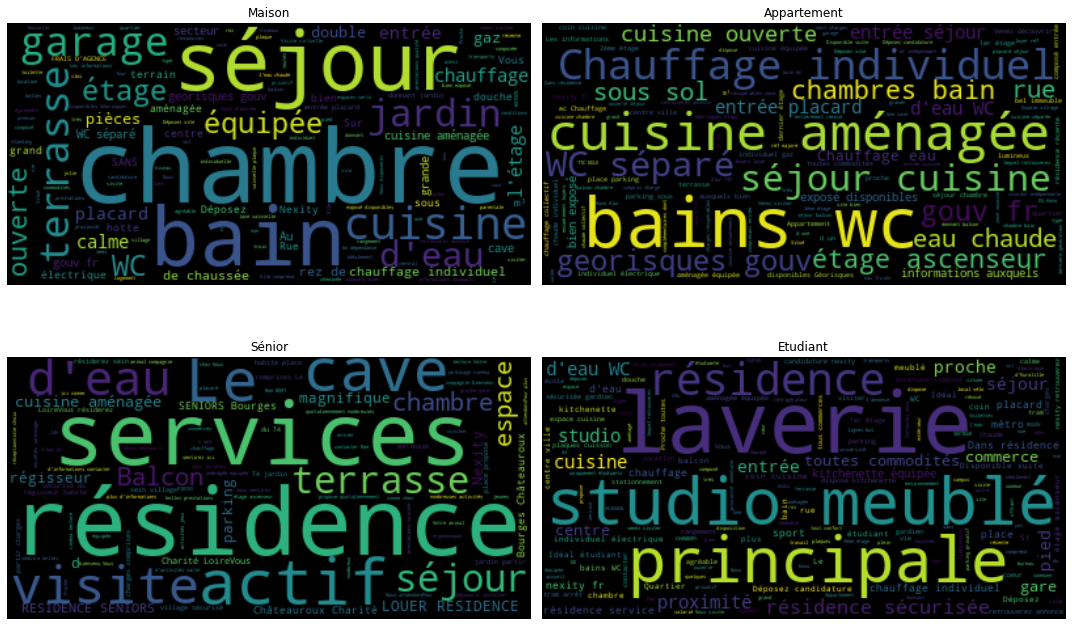

In [74]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words("french"))
additional_stopwords = {"maison", "appartement", "site", "dossier", "déposez", "ligne", "Nexity", "Cette", "cette", "annonce",
                        "logement", "disponible", "comprenant", "risques", "gouv", "fr", "deux", "Maison", "d'une", "d'un", "m²",
                       "ville", "belle", "salle", "gouv.fr", "le", "pourrons", "proposer", "Le", "LE", "Ce", "Retraité", 
                       "le", "T1", "T2", "T3", "T4", "retraité", "Il", "minutes", "étudiant", "étudiante", "georisques", "vivre", "du T4",
                        "pièce", "La", "sénior", "LOUER", "LOCATION", "nexity.fr", "condition", "déposez", "proposons", "gouv  fr", "Cet", "séniors",
                        "situé", "Un", "toutes commodités", "Le", "georisques gouv"
                        
                    }
stop_words.update(additional_stopwords)


titles = ["Maison", "Appartement", "Sénior", "Etudiant"]
tables = [table_maison, table_appart, table_senior, table_etud]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, t in enumerate(tables):
    text = " ".join(review for review in t["Description"])
    text = " ".join(word for word in text.split() if word not in stop_words)

    wordcloud = WordCloud().generate(text)

    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()

* On affiche pour chaque type de logement, un nuage de mots formé à partir des descriptions des logements. 

* On remarque, alors, des caractéristiques déterminantes différentes selon le type de logement.

* Pour les maisons les caractéristiques mises en avant sont : Le séjour, la cuisine, la terrasse, le garage, la cuisine
* Pour les appartements, ce sont : Le chauffage, la salle de bain, les chambres, …
* Pour les résidences sénior : La terrasse, les services, la possibilité de visite, …
* Pour les résidences étudiantes  : le fait que l’appartement soit meublé, la proximité avec les commerce et la gare, la présence de laverie, …


<ul>
    <li><a href="0. Sommaire et résumé.ipynb">Retourner au sommaire</a></li>
    <li><a href="4. ML_Prediction_Loyer.ipynb">Aller à la partie 4</a></li>
    <li><a href="https://eunicekoffi-projetpython-app-wuniri.streamlit.app/">Lien de l'application</a></li>
</ul>